In [1]:
"""
Author: Surabhi S Nath
Description: This script implements descriptive analysis on the data.
"""

'\nAuthor: Surabhi S Nath\nDescription: This script implements descriptive analysis on the data.\n'

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
random.seed(1)
import scipy.stats
import sys
sys.path.insert(1, '../../measures/intricacy/')
from calculate_intricacy import *
sys.path.insert(1, '../../measures/local spatial complexity/')
from calculate_local_spatial_complexity import *
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()
sns.set(font_scale=1.5, font="serif")
pd.set_option('display.max_colwidth', 10000)

In [3]:
df = pd.read_csv("../../data/grid-search/grid_data.csv")
df = df[df["underlying_intricacy"] < 300]
# df.to_csv("../../data/grid-search/grid_data_.csv", index=False)

In [4]:
df2 = pd.read_csv("../../data/grid-search/click_data.csv")
df2 = df2[df2["underlying_intricacy"] < 300]
# df2.to_csv("../../data/grid-search/click_data_.csv", index=False)

In [5]:
df = pd.read_csv("../../data/grid-search/pattern_stats.csv")

Text(0, 0.5, 'Intricacy')

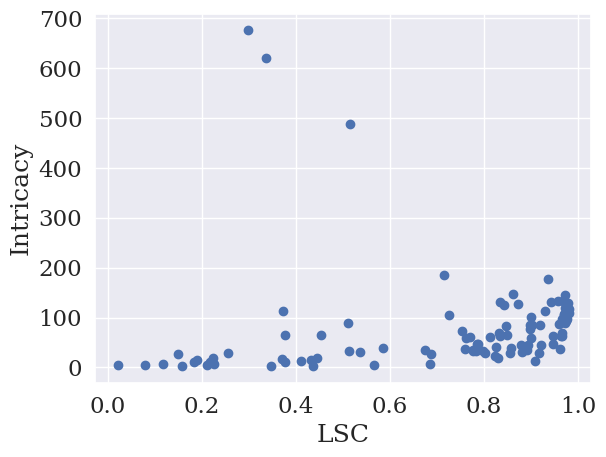

In [6]:
plt.scatter(df["underlying_LSC"], df["underlying_intricacy"])
plt.xlabel("LSC")
plt.ylabel("Intricacy")

In [7]:
from scipy.stats import spearmanr

spearmanr(df["underlying_LSC"], df["underlying_intricacy"])

SignificanceResult(statistic=np.float64(0.5969425061277251), pvalue=np.float64(8.74117341701779e-11))

In [8]:
df[df["underlying_intricacy"] > 300]

,name,range,patternnum,pattern_id,underlying_LSC,underlying_intricacy
27,0.8890_5neigh_outertot_code468_IC2_iter25.png,4,7,23,0.299131,676
41,0.8617_5neigh_outertot_code452_IC1_iter40.png,6,7,37,0.337549,621
90,0.8472_5neigh_outertot_code452_IC1_iter35.png,13,7,86,0.515361,489


In [9]:
df = df[df["underlying_intricacy"] < 300]

In [10]:
np.corrcoef(df["underlying_LSC"], df["underlying_intricacy"])

array([[1.        , 0.60320402],
       [0.60320402, 1.        ]])

(array([ 2.,  6.,  4.,  5.,  5.,  5.,  3., 11., 18., 36.]),
 array([0.02181201, 0.11769848, 0.21358496, 0.30947144, 0.40535792,
        0.5012444 , 0.59713087, 0.69301735, 0.78890383, 0.88479031,
        0.98067679]),
 <BarContainer object of 10 artists>)

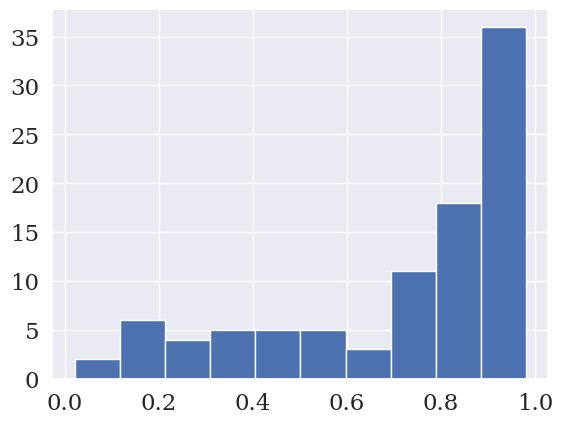

In [11]:
plt.hist(df["underlying_LSC"])

In [19]:
print(np.mean(df["underlying_LSC"]) - np.std(df["underlying_LSC"]), np.mean(df["underlying_LSC"]) + np.std(df["underlying_LSC"]))

0.447874525367184 0.9926388883146929


In [ ]:
sns.set_style("dark")
plt.rc("font", family="serif")
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

# Assuming you have a DataFrame 'df' with columns 'patternname', 'LSC', and 'intricacy'
# Example of DataFrame structure:
# df = pd.DataFrame({
#     'patternname': ['pattern1.png', 'pattern2.png', 'pattern3.png'],
#     'LSC': [1.5, 2.3, 3.1],
#     'intricacy': [5.5, 6.2, 7.3]
# })

# Function to read images
def get_image(path):
    return OffsetImage(plt.imread(path),  zoom=0.02)  # Adjust zoom as per the image size

# Create the plot
fig, ax = plt.subplots(figsize=(5,5))

# Loop through the DataFrame to place images
for idx, row in df.iterrows():
    if row['underlying_intricacy'] > 150:
        continue
    image_path = os.path.join(f'../../patterns/grid-search/experiment/range{row["range"]}/', row['name'])  # Build the image path
    if os.path.exists(image_path):  # Ensure the file exists
        img = get_image(image_path)
        # ab = AnnotationBbox(img, (row['underlying_LSC'], row['underlying_intricacy']), frameon=False)
        ab = AnnotationBbox(img, (row['underlying_LSC'], row['underlying_intricacy']), 
                            frameon=True, 
                            bboxprops=dict(edgecolor='black', linewidth=1),
                            pad=0.001)
        ax.add_artist(ab)

# Set labels
ax.set_xlabel('LSC')
ax.set_ylabel('Intricacy')

# Optionally, adjust the limits of x and y axes
ax.set_xlim(-0.025, 1.03)
ax.set_ylim(-5, 154)

# Display the plot
plt.savefig("plots/LSC_by_intricacy.pdf", format='pdf', dpi=300, bbox_inches='tight')

In [ ]:
max(pd.read_csv("utils/grid_data.csv").groupby("Subject").agg(max)["grid_id"])

In [ ]:
for df in os.listdir("../../data/grid-search/"):
    if df[0:4] != "data":
        continue
    with open("../../data/grid-search/" + df) as f:
        d = json.load(f)
        print(df, d["trials"][0]["num_grids_visited"])